In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
stock_df = pd.read_csv('Nvidia_stock_data.csv')
stock_df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [6]:
stock_df.describe()

,Close,High,Low,Open,Volume
count,6637.000000,6637.000000,6637.000000,6637.000000,6.637000e+03
mean,10.091263,10.279293,9.885371,10.091765,5.952182e+08
std,26.686641,27.192558,26.140134,26.706411,4.297521e+08
min,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,0.259741,0.266981,0.251946,0.259053,3.333360e+08
50%,0.440848,0.447144,0.434353,0.440676,4.961320e+08
75%,4.888134,4.957336,4.810735,4.895365,7.269720e+08
max,149.416245,153.115916,147.806407,153.015919,9.230856e+09


In [7]:
stock_df.isna().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB


Exploratory data analysis

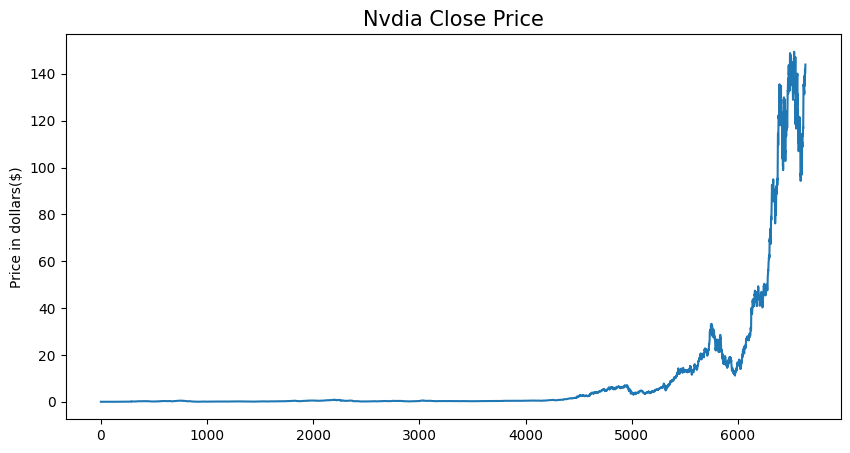

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(stock_df['Close'])
plt.title('Nvdia Close Price', fontsize=15)
plt.ylabel('Price in dollars($)')
plt.show()

C:\Users\ankishaw\AppData\Local\Temp\ipykernel_37272\112939834.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_df[col])
C:\Users\ankishaw\AppData\Local\Temp\ipykernel_37272\112939834.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_df[col])
C:\Users\ankishaw\AppData\Local\Temp

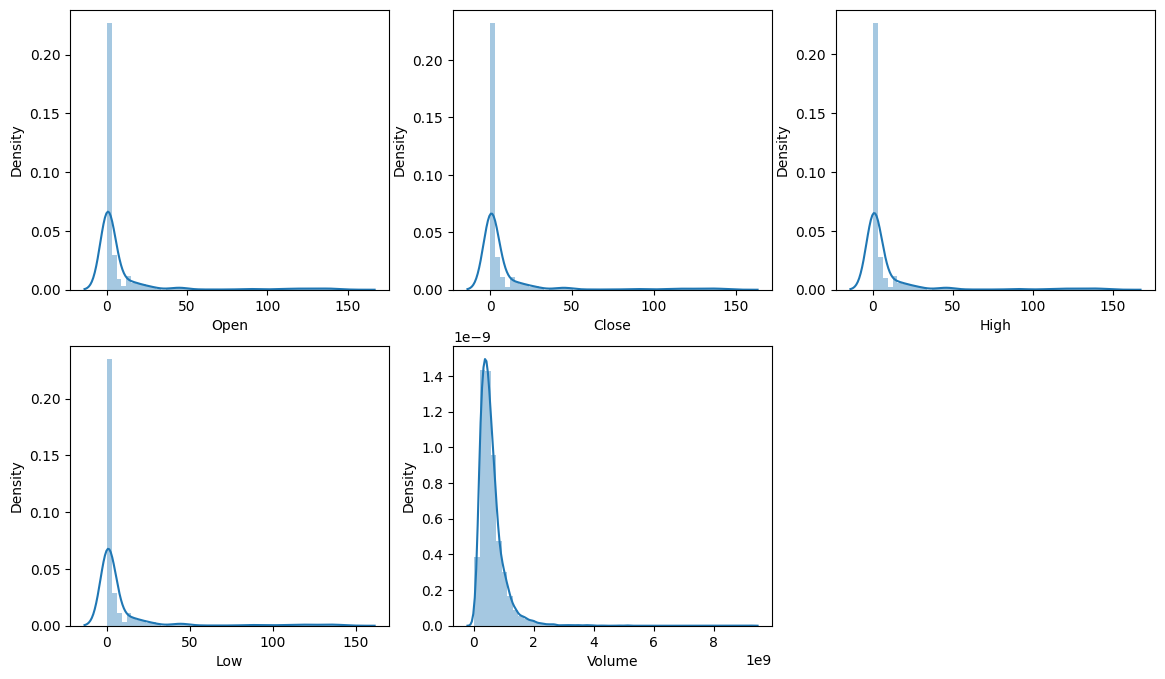

In [28]:
#checking for skeweness of data
features = ['Open', 'Close', 'High', 'Low', 'Volume']
plt.figure(figsize=(14, 8))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.distplot(stock_df[col])
plt.show()

In the Distribution plot we can see that the data is left skewed

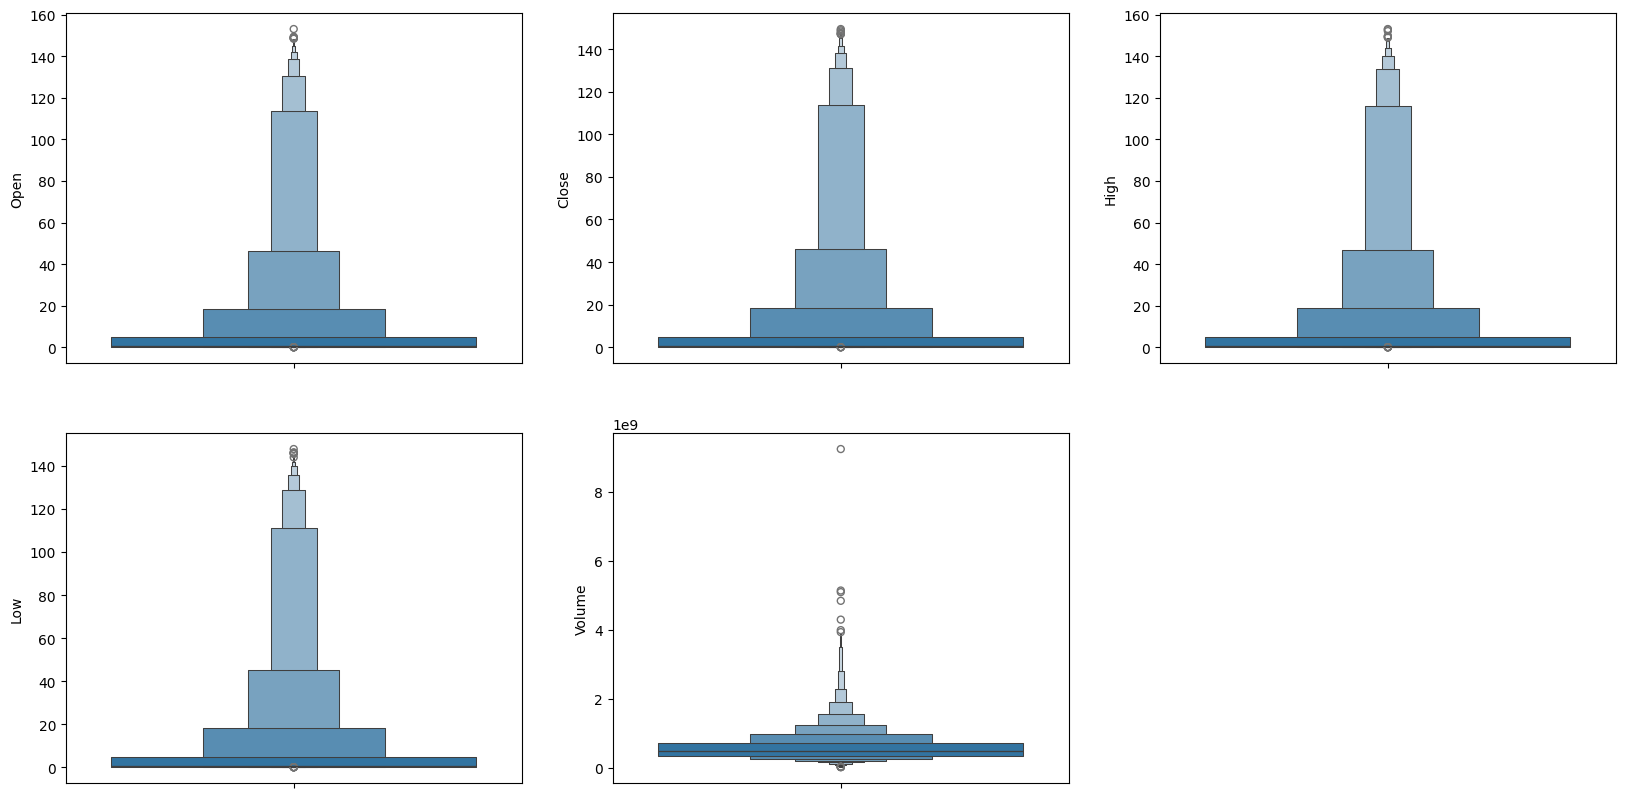

In [32]:
#checking for any outliers
plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(stock_df[col])

plt.show()

The boxenplot analysis indicates the presence of outliers in all columns, with the Volume column exhibiting the most outliers.

**Feature Engineering**

In [33]:
splitted_date = stock_df['Date'].str.split('-', expand=True)

stock_df['Year'] = splitted_date[0].astype('int')
stock_df['Month'] = splitted_date[1].astype('int')
stock_df['Day'] = splitted_date[2].astype('int')

stock_df.head(5)

,Date,Close,High,Low,Open,Volume,Year,Month,Day
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000,1999,1,22
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000,1999,1,25
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000,1999,1,26
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000,1999,1,27
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000,1999,1,28


In [34]:
stock_df['is_quater_ended'] = np.where(stock_df['Month']%3==0, 1, 0)
stock_df.head(5)

,Date,Close,High,Low,Open,Volume,Year,Month,Day,is_quater_ended
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000,1999,1,22,0
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000,1999,1,25,0
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000,1999,1,26,0
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000,1999,1,27,0
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000,1999,1,28,0


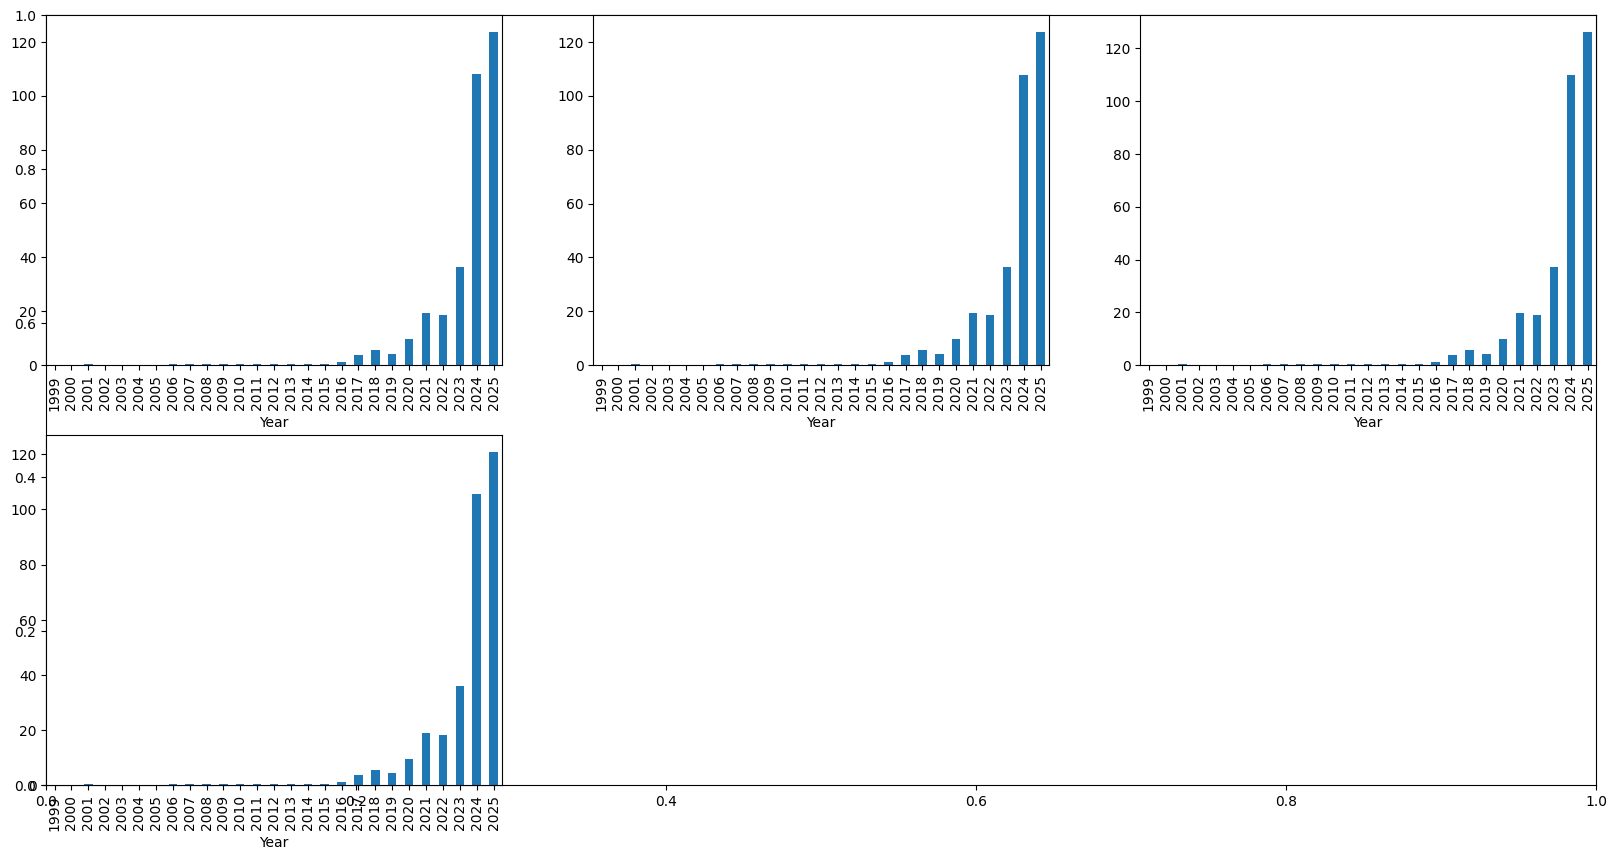

In [37]:
data_grouped = stock_df.drop('Date', axis=1).groupby('Year').mean()

plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'Close', 'High', 'Low']):
    plt.subplot(2, 3, i+1)
    data_grouped[col].plot.bar()

plt.show()

From the above graph we can conclude that the Nvidia stock price increased rapidly from the year 2019

In [39]:
stock_df.drop('Date', axis=1).groupby('is_quater_ended').mean()

,Close,High,Low,Open,Volume,Year,Month,Day
is_quater_ended,,,,,,,,
0,10.191805,10.381613,9.978286,10.189424,6.048836e+08,2011.789259,6.053478,15.727623
1,9.891759,10.076264,9.701003,9.897981,5.760394e+08,2011.665468,7.388040,15.745953


From the above grouped data, we can conclude that:
1. The Volume of stock traded is greater in the month which are not quater end
2. Prices are lower in the month which are quater ends as compare to those which to that of the non-quater end months.

In [40]:
stock_df['Open - Close'] = stock_df['Open'] - stock_df['Close']
stock_df['Low - High'] = stock_df['Low'] - stock_df['High']
stock_df['Target'] = np.where(stock_df['Close'].shift(-1)> stock_df['Close'], 1, 0)

stock_df.head(5)

,Date,Close,High,Low,Open,Volume,Year,Month,Day,is_quater_ended,Open - Close,Low - High,Target
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000,1999,1,22,0,0.002507,-0.009194,1
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000,1999,1,25,0,-0.000956,-0.004417,0
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000,1999,1,26,0,0.003701,-0.005134,0
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000,1999,1,27,0,0.000238,-0.003105,0
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000,1999,1,28,0,0.000120,-0.000597,0


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only

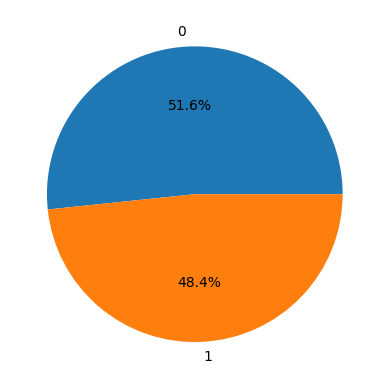

In [43]:
#to check whether the target column is balanced or not
plt.pie(stock_df['Target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

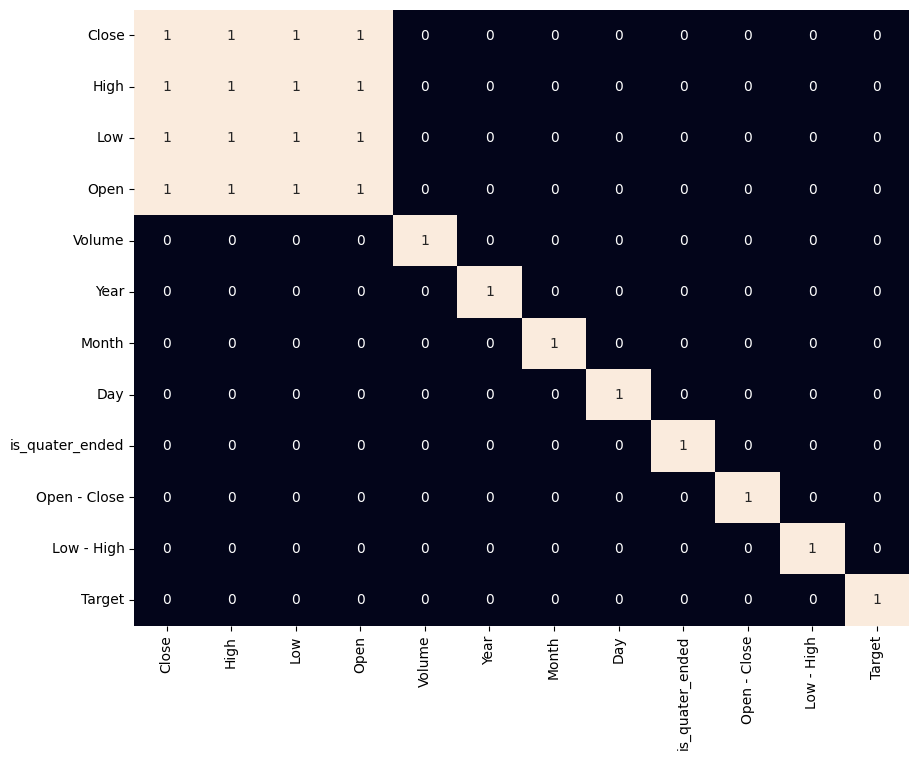

In [47]:
#to check the correlation

plt.figure(figsize=(10, 8))

sns.heatmap(stock_df.drop('Date', axis=1).corr()> 0.9, annot=True, cbar=False)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Data splitting and normalization

In [51]:
features  = stock_df[['Open - Close', 'Low - High', 'is_quater_ended']]
target = stock_df['Target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)
print(x_train.shape, x_test.shape)

(5309, 3) (1328, 3)


Model Development

In [52]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(x_train, y_train)

    print(f'{models[i]}: ')
    print('Training Accuracy: ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))
    print('Validation Accuracy: ', metrics.roc_auc_score(y_test, models[i].predict_proba(x_test)[:,1]))
    print()

LogisticRegression(): 
Training Accuracy:  0.5197516426427792
Validation Accuracy:  0.5273752981249049

SVC(kernel='poly', probability=True): 
Training Accuracy:  0.5006732561840669
Validation Accuracy:  0.5092801659287768

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...): 
Training Accu

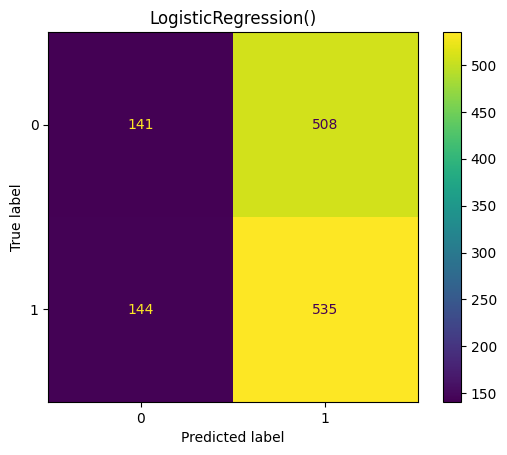

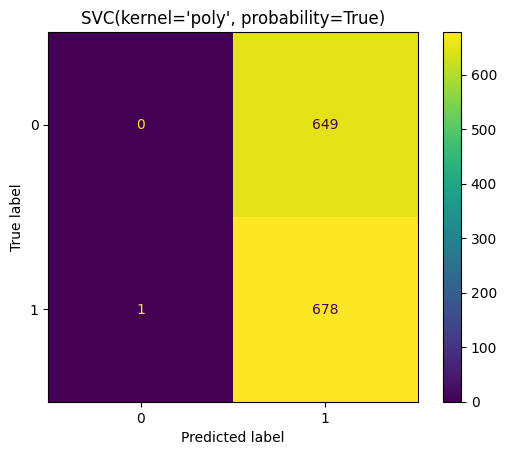

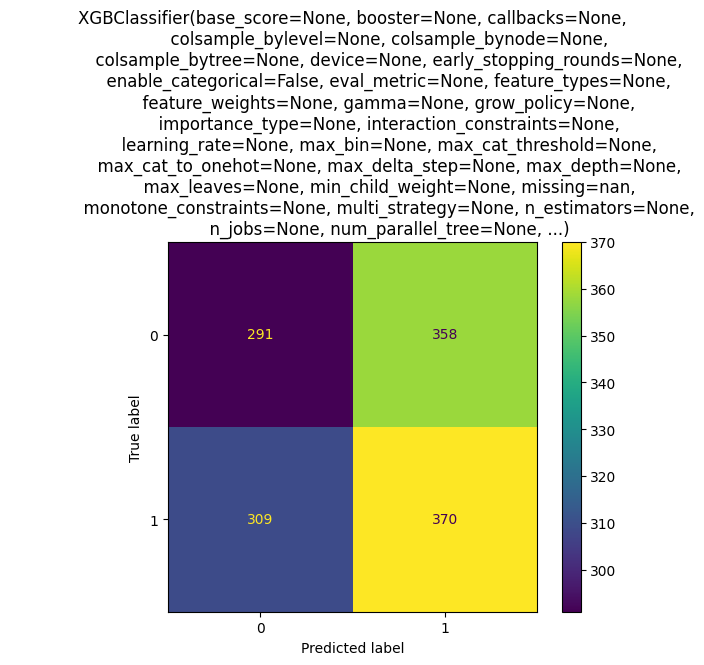

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

for i in range(3):
    
    ConfusionMatrixDisplay.from_estimator(models[i], x_test, y_test)
    plt.title(f'{models[i]}')

plt.show()